# Modeling

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline 

In [13]:
df = pd.read_csv('cleaned vehicles data to modeling.csv')

In [14]:
df.head()

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,price,year_make,odometer,mpg,rating,year_difference,new_price,depreciation per year
0,5,143,2,4,2,0,0,0,1,0,10,8995.0,2011,178054.0,21.0,4.3,10,25426.696,0.098696
1,9,51,2,4,2,0,0,0,1,0,10,10995.0,2014,170259.0,24.0,4.1,7,29137.649,0.129970
2,20,122,0,2,2,0,0,0,2,0,1,12984.0,2016,86942.0,30.0,4.7,5,24223.771,0.117259
3,20,107,0,4,2,4,0,0,1,0,0,17382.0,2015,48932.0,23.0,4.1,5,29957.047,0.103149
4,9,51,0,4,2,4,0,0,1,0,0,25730.0,2017,49858.0,24.0,4.1,4,30921.106,0.044906


In [15]:
df.shape

(8030, 19)

In [16]:
df.drop(columns=['price', 'year_make'], axis=1, inplace =True)

In [17]:
df.shape

(8030, 17)

In [18]:
# Split the data into dependent or target variable as y,  and predicator variables as X
y = df['depreciation per year']
X = df.drop('depreciation per year', axis=1)

In [19]:
# Split the data into train and test, train_size is 0.7 using train_test_plit method, 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=47)

In [20]:
# Check the dimensions of training set meet the train size is 0.7
X_train.shape, X_test.shape

((5621, 16), (2409, 16))

In [21]:
X_train.columns

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'odometer', 'mpg', 'rating', 'year_difference', 'new_price'],
      dtype='object')

In [22]:
X_train.head()

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,odometer,mpg,rating,year_difference,new_price
2890,9,96,2,4,2,0,0,2,0,2,0,144000.0,24.0,4.6,16,20225.298
204,23,61,2,3,2,0,0,1,0,3,1,102879.0,31.0,4.1,10,19782.699
2252,24,155,0,4,2,0,0,1,2,0,0,157015.0,26.0,4.3,12,41352.525
982,14,120,3,2,2,0,1,1,0,8,9,150000.0,36.0,4.3,12,13258.513
6255,20,107,1,4,2,0,0,0,1,0,9,211000.0,23.0,4.1,15,24575.212


# Linear Regression

In [23]:
# Scale and transform the data 
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [24]:
# Apply linearRegression model and fit the X_tr_scaled.
lm = LinearRegression()
lm.fit(X_tr_scaled, y_train)

LinearRegression()

In [25]:
# Make perdictions using the model on both train and test splits 
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [26]:
# Assess Model Performance
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.19738598426985376, 0.19077344219184733)

In [16]:
# Compare the result sklearn library and funtioned defined above.
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.036328695341388696, 0.03567616701733572)

In [18]:
# mean-squared-error from scaled dataset minimize the error
np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))

(0.06904168700781123, 0.06634485295521103)

In [19]:
# Generally Scaling minimize errors 

# Using Pipeline

In [28]:
# Using linearRegression model to predict 'depreciation rate per year'
pipe = make_pipeline(SimpleImputer(strategy='median'),
                    StandardScaler(f_regression),
                    SelectKBest(),
                    LinearRegression())

/Users/temesgentesfay/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass copy=<function f_regression at 0x7fed03c295e0> as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [29]:
# Fit the split trainig data
pipe.fit(X_train, y_train)

/Users/temesgentesfay/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler',
                 StandardScaler(copy=<function f_regression at 0x7fed03c295e0>)),
                ('selectkbest', SelectKBest()),
                ('linearregression', LinearRegression())])

In [30]:
# Compare result R^2 using the pipe line
y_tr_pred = pipe.predict(X_train)
y_ts_pred = pipe.predict(X_test)
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.16908204508582358, 0.19077344219184733)

In [32]:
# let check the r2-square result by reducing the number of fearures
pipe15 = make_pipeline(SimpleImputer(strategy='median'),
                      StandardScaler(),
                      SelectKBest(f_regression, k=16),
                      LinearRegression())

In [33]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=16,
                             score_func=<function f_regression at 0x7fed03c295e0>)),
                ('linearregression', LinearRegression())])

In [34]:
y_tr_pred = pipe15.predict(X_train)
y_ts_pred = pipe15.predict(X_test)
r2_score(y_train, y_tr_pred), r2_score(y_test, y_ts_pred)

(0.19738598426985376, 0.19077344219184733)

In [27]:
# Imputing with mean and medain return the same R-squared values. This could be either the distribution is normal 
# or there is no missing value is imputed.

In [36]:
#Assess Perfomance Using Cross-Validation CV
cross_val = cross_validate(pipe15, X_train, y_train, cv=5)
cv_score = cross_val['test_score']
cv_score

array([0.20166417, 0.17878579, 0.17644828, 0.2034418 , 0.18273846])

In [37]:
# There is a great variability within the datasets is based on the outlieries datapoints in folds.

In [38]:
mean_cv_score = cv_score.mean()
mean_cv_score, cv_score.std()

(0.1886157014092626, 0.011569710187947092)

In [39]:
# five fold cross validation reduce the R-squared result compared to the value obtain without coross validation. 

In [79]:
# Withine the two standard deviation 95% R_squdare distribution lies between 16.55% to 21.17%
mean_cv_score - (2* cv_score.std()), mean_cv_score + 2*(cv_score.std())

(0.16547628103336842, 0.21175512178515676)

In [41]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [42]:
# Create param_grid where search pass through all options then return best.
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k':k}

In [43]:
# GridSearch to the pipe line and param_grids with cross-validation 5 folds.
lr_gd_cv = GridSearchCV(pipe, param_grid = grid_params, cv=5,n_jobs=-1)

In [44]:
for param in lr_gd_cv.get_params().keys():
    print(param)

cv
error_score
estimator__memory
estimator__steps
estimator__verbose
estimator__simpleimputer
estimator__standardscaler
estimator__selectkbest
estimator__linearregression
estimator__simpleimputer__add_indicator
estimator__simpleimputer__copy
estimator__simpleimputer__fill_value
estimator__simpleimputer__missing_values
estimator__simpleimputer__strategy
estimator__simpleimputer__verbose
estimator__standardscaler__copy
estimator__standardscaler__with_mean
estimator__standardscaler__with_std
estimator__selectkbest__k
estimator__selectkbest__score_func
estimator__linearregression__copy_X
estimator__linearregression__fit_intercept
estimator__linearregression__n_jobs
estimator__linearregression__normalize
estimator
iid
n_jobs
param_grid
pre_dispatch
refit
return_train_score
scoring
verbose


In [45]:
# Fit train dataset to grid search output
result = lr_gd_cv.fit(X_train, y_train)

/Users/temesgentesfay/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [47]:
score_mean = result.cv_results_['mean_test_score']
score_std = result.cv_results_['std_test_score']
cv_k = [k for k in lr_gd_cv.cv_results_['param_selectkbest__k']]

In [48]:
# The best params attribut of lr-grid_cv
lr_gd_cv.best_params_

{'selectkbest__k': 16}

<ipython-input-49-6f3e9d8efc66>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.axvline(x=best_k, C='r', ls='--')


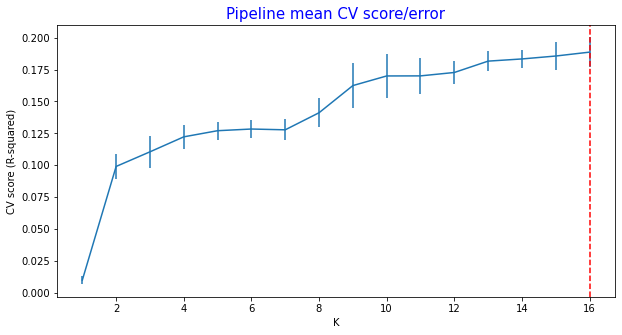

In [49]:
# Line graph on error distribution
best_k = [lr_gd_cv.best_params_['selectkbest__k']]
plt.subplots(figsize=(10,5))
plt.errorbar(cv_k, score_mean,  yerr = score_std)
plt.axvline(x=best_k, C='r', ls='--')
#plt.axvline(x=10, C='blue', linestyle='--')
plt.xlabel('K')
plt.ylabel('CV score (R-squared)')
plt.title('Pipeline mean CV score/error', size=15, color='blue')
plt.show()

In [41]:
# From the eyeballing at  k = 10 yield best result, despite slight improvement
# until k = 16 but the last six features contirbute more to overfitting the model. 

In [50]:
selected = lr_gd_cv.best_estimator_.named_steps.selectkbest.get_support()

In [51]:
# Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
# get the matching feature names from the column names of the dataframe,
# and display the results as a pandas Series with `coefs` as the values and `features` as the index,
# sorting the values in descending order
coefs = lr_gd_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending= False)

odometer           0.012428
new_price          0.011549
type               0.009165
mpg                0.008748
condition          0.008081
fuel               0.006969
model              0.006862
title_status       0.006514
drive              0.006210
size               0.000273
paint_color       -0.000282
manufacturer      -0.002042
transmission      -0.002398
cylinders         -0.004668
rating            -0.012349
year_difference   -0.022407
dtype: float64

# Decision Tree Regressor

In [52]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(random_state=47, criterion='mse')
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=5)

print('The mean of corss validated score: %.3f'%(np.mean(dt_scores)))
print('The mean score without CV: %.3f'%(dt.score(X_train, y_train)))

The mean of corss validated score: -0.186
The mean score without CV: 0.999


In [53]:
# On the test or hold-out set 
y_pred = dt.predict(X_test)
print( r2_score(y_test, dt.predict(X_test)))
print(dt.score(X_test, y_test))

-0.21212202528702107
-0.21212202528702107


In [54]:
# Apply GrideSearchCV on decision Tree with five-fold cross validation
param_grid = {"max_depth":range(2, 18),'min_samples_split': range(2,18)}
gs = GridSearchCV(DecisionTreeRegressor(random_state=47 ),
                  param_grid = param_grid,  cv=5)
gs.fit(X_train, y_train)
print('The best samplle split is {}'.format(gs.best_params_))
print(f'The best score is {gs.best_score_}')  

The best samplle split is {'max_depth': 4, 'min_samples_split': 8}
The best score is 0.25252574100834085


In [51]:
#The model return best result at the max depth 8 with 25.25%  R-squared.

In [87]:
from sklearn.model_selection import cross_val_score

dt_ame = DecisionTreeRegressor(random_state=47, criterion='mae')
dt_ame.fit(X_train, y_train)
dt_ame_scores = cross_val_score(dt_ame, X_train, y_train, cv=5)
print(dt_ame_scores)
print('The Score without CV: %.3f'%(dt_ame.score(X_train, y_train)))

[-0.48574728 -0.25901098 -0.30383733 -0.12543405 -0.28302711]
The Score without CV: 0.999


In [88]:
y_pred = dt_ame.predict(X_test)
print( r2_score(y_test, y_pred))
print(dt_ame.score(X_test, y_test))

-0.4140939444029039
-0.4140939444029039


In [59]:
# Apply GrideSearchCV on decision Tree
param_grid = {"max_depth":range(2, 18),'min_samples_split': range(2,18)}
gsa = GridSearchCV(DecisionTreeRegressor(random_state=47 ),
                  param_grid = param_grid,  cv=5)
gsa.fit(X_train, y_train)
print('The best samplle split is {}'.format(gsa.best_params_))
print(f'The best score is {gsa.best_score_}')  

The best samplle split is {'max_depth': 4, 'min_samples_split': 8}
The best score is 0.25252574100834085


# Random Forest Regression

In [60]:
# Define a pipleline
# Use SimpleImputer strategy is median , and StandardScaler()
# Define randomeforestregressor as random state is 42
RF_pipe = make_pipeline(
                        SimpleImputer(strategy='median'),
                        StandardScaler(),
                        RandomForestRegressor(random_state=47)
)

In [61]:
# Fit and assess the performance with Cross Validation
forest_cv_result = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [62]:
forest_cv_score = forest_cv_result['test_score']
forest_cv_score

array([0.3816075 , 0.35763843, 0.40200047, 0.43733541, 0.32454609])

In [63]:
np.mean(forest_cv_score), np.std(forest_cv_score)

(0.3806255805752875, 0.03833320355560358)

In [ ]:
# Random Forest Regressor corssvalidation return R_score 38.06% is far better than DecisionTreeRegressor

In [69]:
n_est = [int(n +1) for n in range(len(X_train.columns)+ 1)]
grid_params = {
    'randomforestregressor__n_estimators': n_est,
    'standardscaler':[StandardScaler(),None],
    'simpleimputer__strategy':['mean', 'median']
}

In [70]:
forest_gd_cv = GridSearchCV(RF_pipe, param_grid = grid_params, cv=5, n_jobs=-1)

In [71]:
forest_gd_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [1, 2, 3, 4, 5,
                                                                 6, 7, 8, 9, 10,
                                                                 11, 12, 13, 14,
                                                                 15, 16, 17],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [72]:
forest_gd_cv.best_params_

{'randomforestregressor__n_estimators': 16,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [74]:
# The accuracy score from hperparameter tuning.
print('RandomForest best score accuracy is, {:3f}'.format(forest_gd_cv.best_score_))

RandomForest best score accuracy is, 0.364796


In [75]:
forest_gd_cv_result = cross_validate(forest_gd_cv.best_estimator_, X_train, y_train, cv=5)

In [76]:
# The accuracy of each cross validated outcome
forest_gd_score = forest_gd_cv_result['test_score']
forest_gd_score

array([0.35727972, 0.33008927, 0.38901418, 0.42525934, 0.32233821])

In [77]:
np.mean(forest_gd_score), np.std(forest_gd_score)

(0.3647961457662233, 0.038225780033715906)

 1 transmission          0.00458
 2 cylinders             0.01177
 3 drive                 0.02152
 4 title_status          0.02345
 5 size                  0.03001
 6 fuel                  0.03665
 7 rating                0.03675
 8 condition             0.03911
 9 mpg                   0.03928
10 type                  0.04021
11 manufacturer          0.04426
12 paint_color           0.05373
13 new_price             0.06618
14 model                 0.07068
15 odometer              0.22139
16 year_difference       0.26045


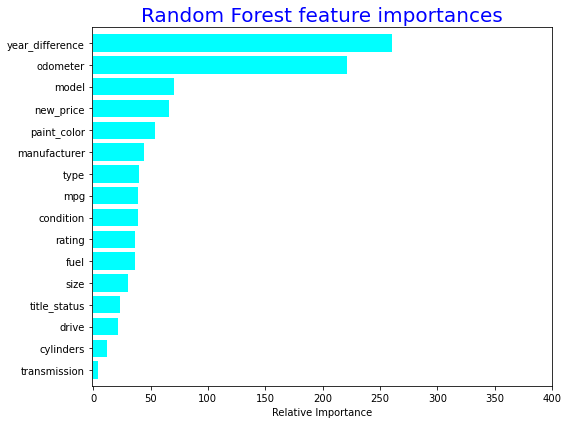

In [86]:
#Plot a barplot of the random forest's feature importances,
#assigning the feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values 

forest = RandomForestRegressor( random_state=47)
feature_labels = df.columns.drop('depreciation per year')
forest.fit(X_train, y_train)
importances = forest.feature_importances_
#assign value in ascending order
indices = np.argsort(importances)[: :]
for i in range (X_train.shape[1]):
    print("%2d %-*s %.5f" %(i+1, 21, feature_labels[indices[i]], importances[indices[i]]))
plt.figure(figsize=(8, 6))
plt.title('Random Forest feature importances', color='blue', size=20)
plt.xlabel('Relative Importance')
#plt.xscale('log')
plt.barh(range(X_train.shape[1]),importances[indices]*1000, color='cyan')
plt.yticks(range(X_train.shape[1]),feature_labels[indices], rotation=0, color= 'black')
plt.xlim([-1, 400])
plt.tight_layout()
plt.margins(0.02)

Conculustion:
Random Forest return the best accuracy score comapred to LinarRegression and DecisionRegressionTree models
moreover,random forset provide the most relevant features therefore, "year_difference", "odomoter", "model", 
"new_price", "paint_color" and "manufacturers" are taking the dominant contribution in R-squared score. Thus 
depreciation rate of a vehicles primairly depend on those six parameters to evaluate vehicles price. 